In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('air-traffic-passenger-statistics.csv')

In [3]:
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
...,...,...,...,...,...,...,...,...,...,...,...,...
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [5]:
df.corr(numeric_only=True)

,Activity Period,Passenger Count
Activity Period,1.000000,0.050677
Passenger Count,0.050677,1.000000


In [6]:
df.isnull().sum()

,0
Activity Period,0
Operating Airline,0
Operating Airline IATA Code,63
Published Airline,0
Published Airline IATA Code,63
GEO Summary,0
GEO Region,0
Activity Type Code,0
Price Category Code,0
Terminal,0


In [7]:
df['Activity Period'].describe()

,Activity Period
count,18885.000000
mean,201179.285994
std,385.755460
min,200507.000000
25%,200811.000000
50%,201204.000000
75%,201509.000000
max,201806.000000


In [8]:

df.drop(columns=['Operating Airline IATA Code','Published Airline IATA Code','Published Airline'])

,Activity Period,Operating Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090
...,...,...,...,...,...,...,...,...,...
18880,201806,WOW Air,International,Europe,Enplaned,Other,International,G,50
18881,201806,WestJet Airlines,International,Canada,Deplaned,Other,International,A,10868
18882,201806,WestJet Airlines,International,Canada,Enplaned,Other,International,A,11664
18883,201806,XL Airways France,International,Europe,Deplaned,Other,International,A,804


### EDA

In [9]:
import seaborn as sns

<Axes: >

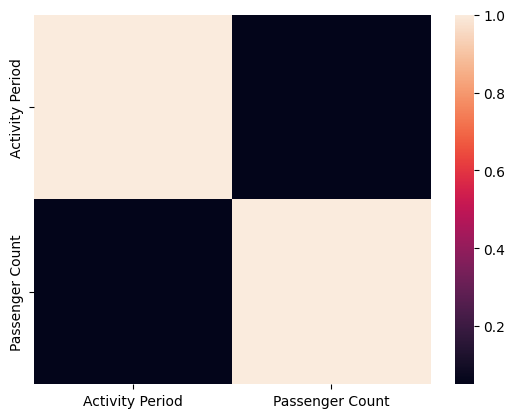

In [10]:
sns.heatmap(df.corr(numeric_only=True))

In [11]:
#Hava yolu şirketlerinin kaç defa uçuş yaptıkları
airline_count = df["Operating Airline"].value_counts()

In [12]:
#Hava yolu şirketleri ile uçan yolcu
airline_passenger_count=df.groupby(df["Operating Airline"]).sum()["Passenger Count"].sort_values(ascending=False)

In [13]:
list_group=pd.DataFrame(airline_passenger_count)
list_group.head(10)

,Passenger Count
Operating Airline,
United Airlines,112640408
United Airlines - Pre 07/01/2013,105363917
SkyWest Airlines,44582356
American Airlines,43622387
Virgin America,37843920
Delta Air Lines,34813833
Southwest Airlines,33414970
Alaska Airlines,17540235
US Airways,16816616


In [14]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Hava yolu şirketlerinin taşıdığı yolcu sayıları')

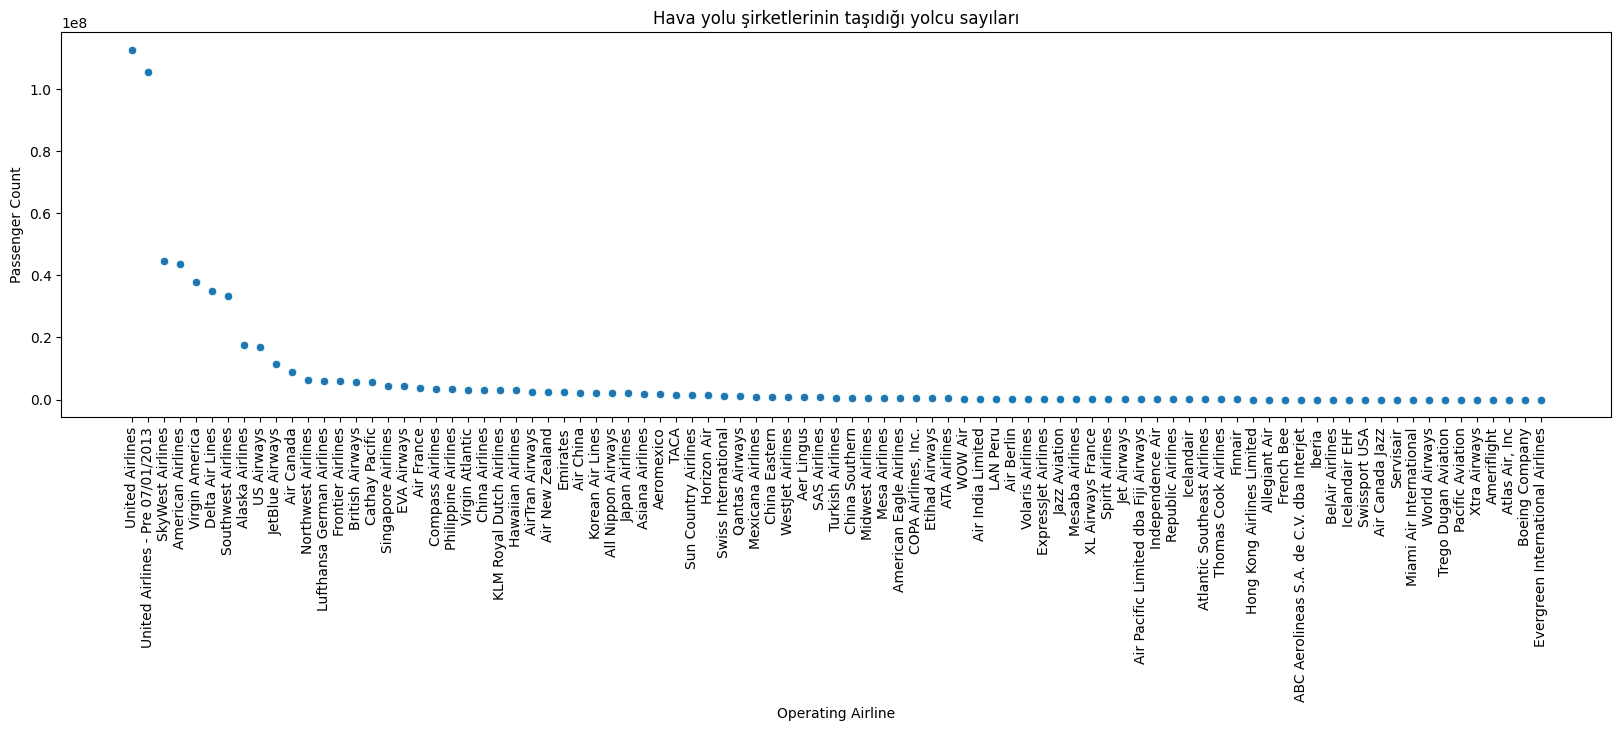

In [15]:
plt.figure(figsize=(20,5))
sns.scatterplot(x="Operating Airline",y="Passenger Count",data=list_group)
plt.xticks(rotation=90);
plt.title("Hava yolu şirketlerinin taşıdığı yolcu sayıları")

In [16]:
#Hava yolu şirketleri ile uçan yolcu sa
airline_passenger_count_of_year=df.groupby(df["Activity Period"]).sum()["Passenger Count"].sort_values(ascending=False)

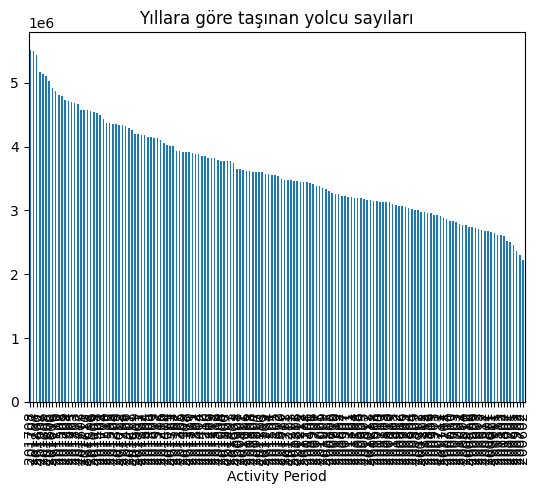

In [17]:
airline_passenger_count_of_year.plot.bar()
plt.title("Yıllara göre taşınan yolcu sayıları");

In [18]:
df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count'],
      dtype='object')

In [19]:
x=df[['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count']]

In [20]:
x=pd.get_dummies(x,drop_first=True)

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [22]:
model=KMeans(4)

In [23]:
model=model.fit(x)

In [24]:
tahmin=model.predict(x)

In [25]:
silhouette_score(x,tahmin)

0.7854429082507773

In [26]:
#wcss= within cluster sum of squares

wcss=[]

ss=[]

for i in range(2,10):

    model=KMeans(i)

    model=model.fit(x)

    tahmin=model.predict(x)

    ss1=silhouette_score(x,tahmin)

    ss.append(ss1)

    print(ss1)

    wcss.append(model.inertia_)


0.8594457249767689
0.8281862100969395
0.814828285319893
0.7837146504254483
0.6570012233309955
0.6411190833206643
0.6344107039435386
0.609759686522779


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

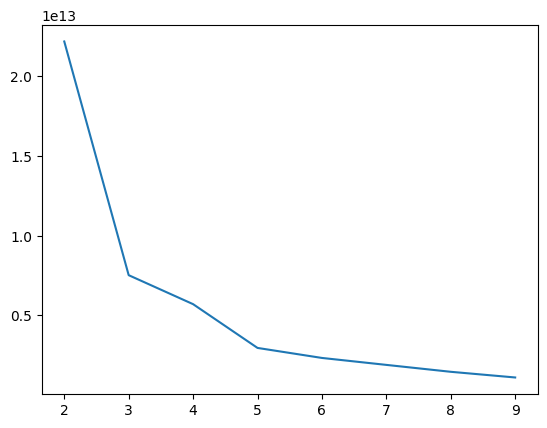

In [28]:
plt.plot(range(2,10),wcss)

In [36]:
#pip install yellowbrick

In [30]:
from yellowbrick.cluster import KElbowVisualizer

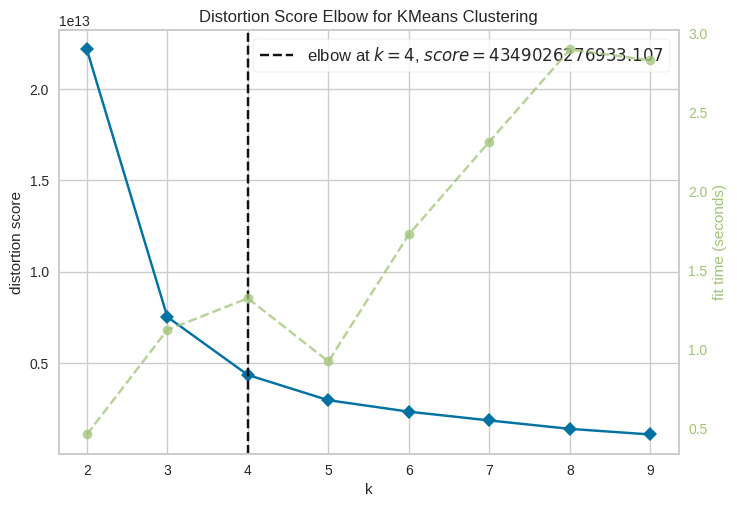

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show()

In [32]:
# HİERARCHİCAL CLUSTERİNG

In [33]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [34]:
data=linkage(x,method='ward',metric='euclidean')

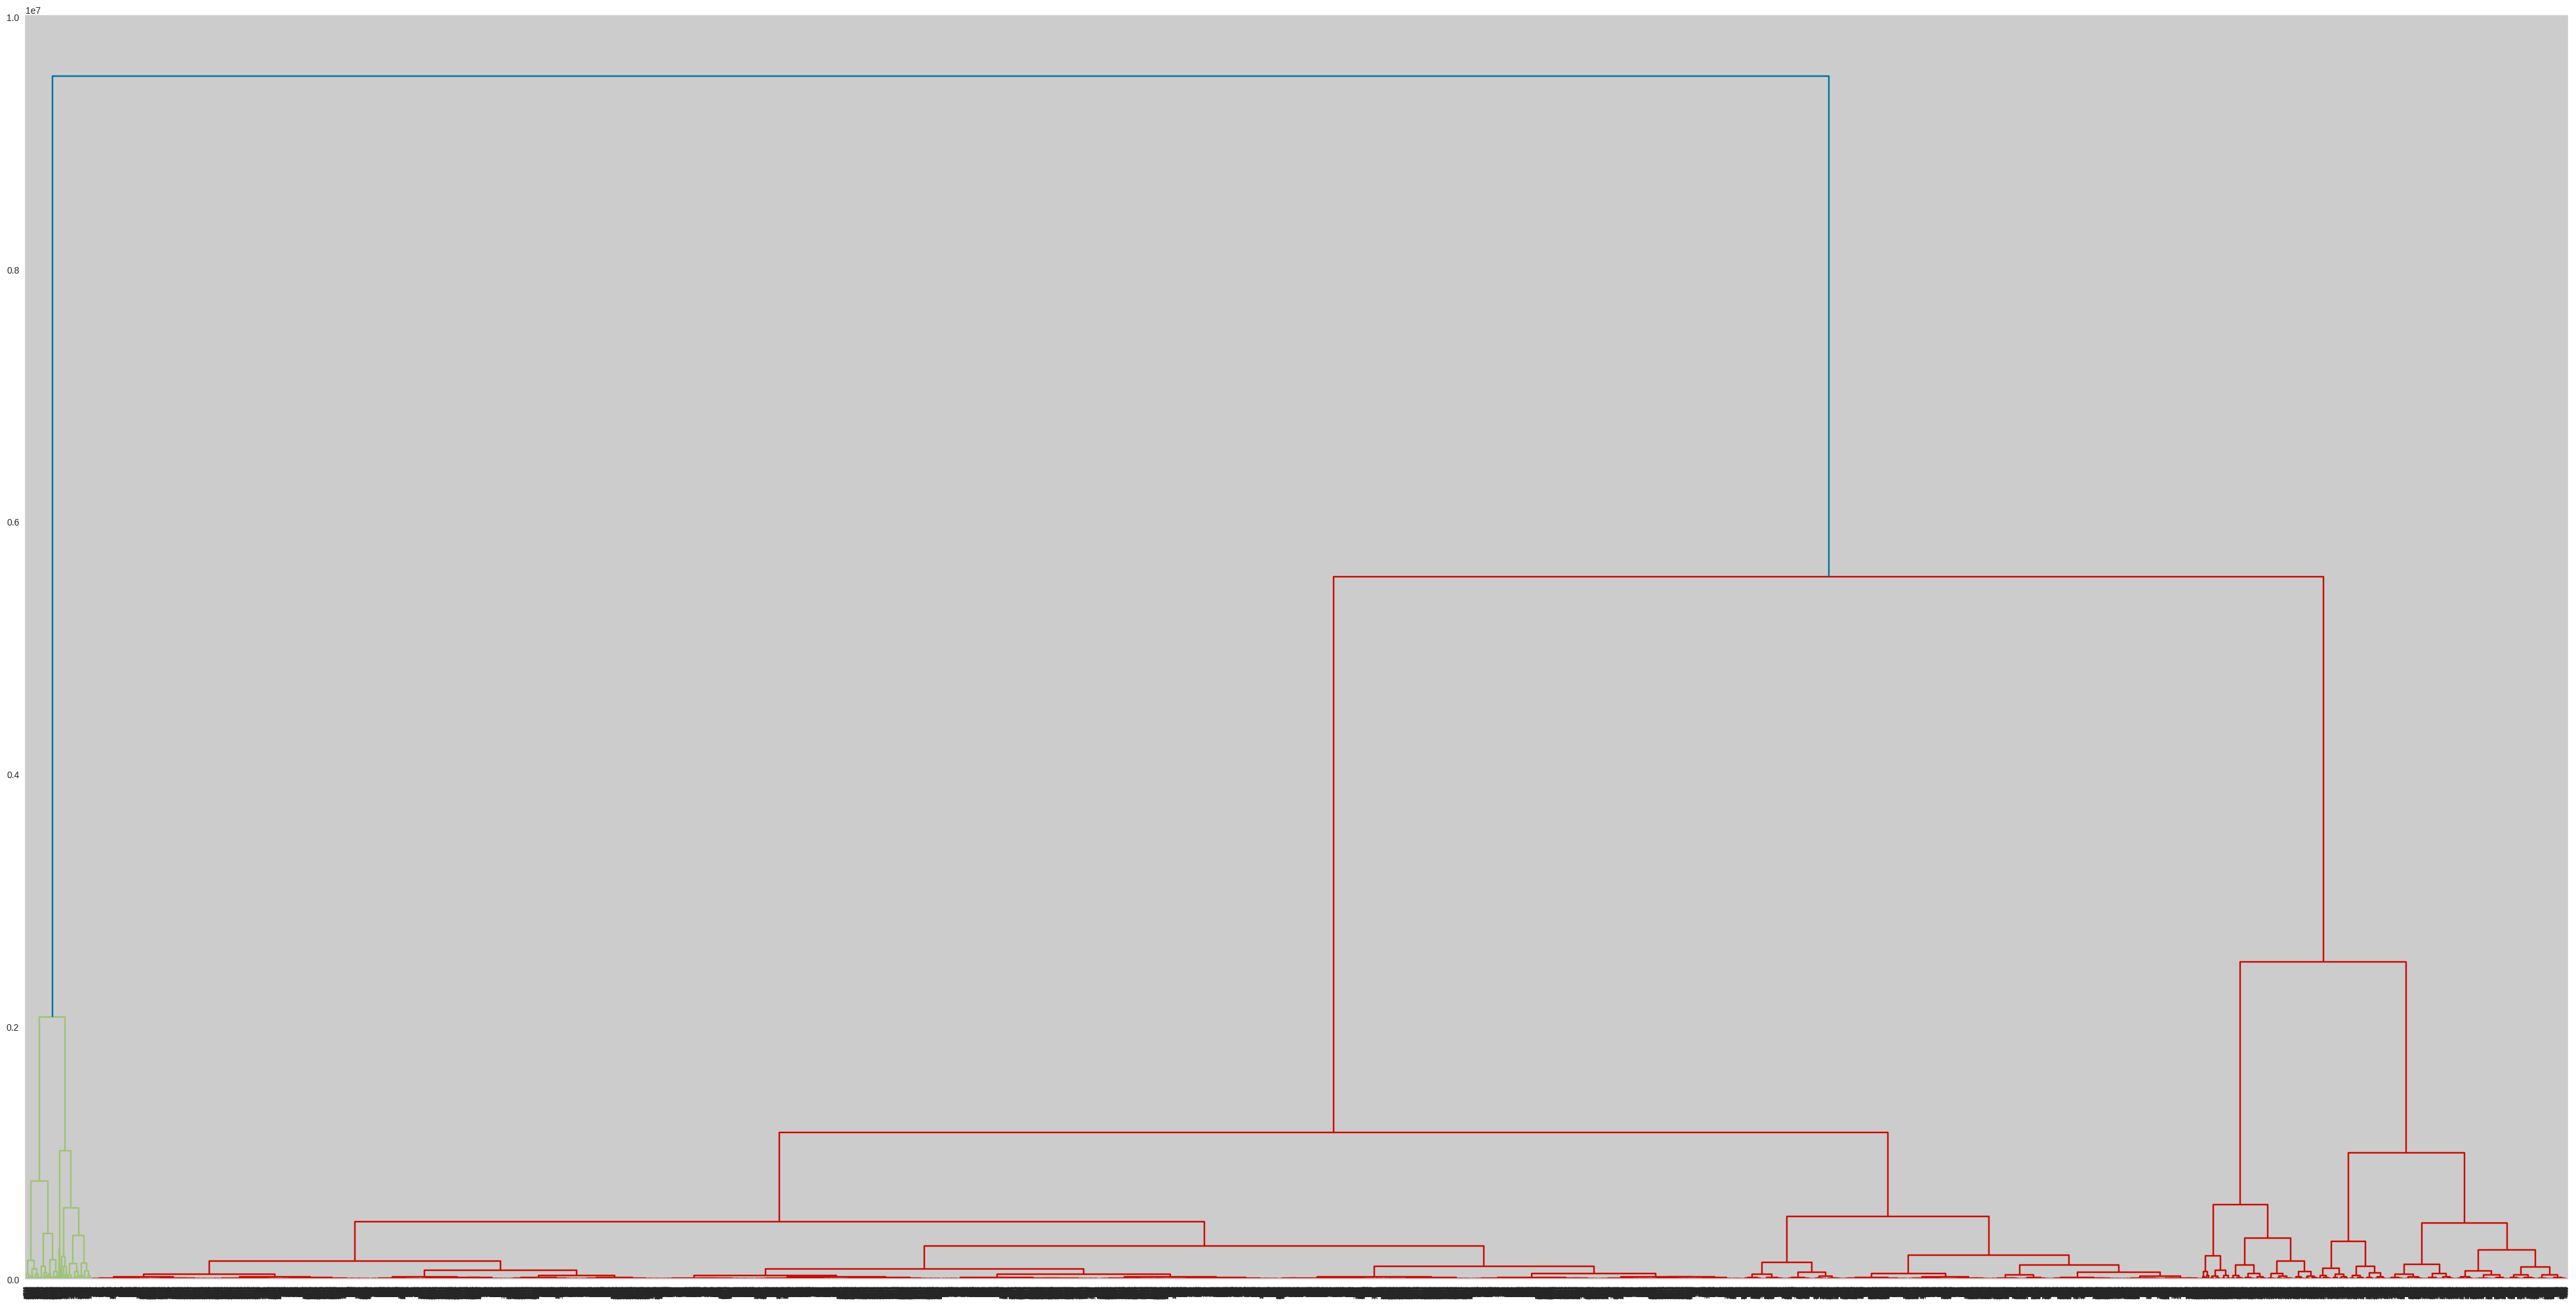

In [35]:
plt.figure(figsize=(50,25))
dendrogram(data);